# 统一和清理交叉口和路段

现实世界中的交叉口在路网中应该为一个节点，然而存在一个交叉口由四个很近的节点表示，同时环形交叉口存在类似的情况，几条路段与一个环相交。这个函数处理这种情况，合并重叠的节点，并返回质心的Geoseries来清理这些簇，为获得最佳效果，应将公差参数调整到近似匹配道路的设计标准

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
ox.config(use_cache=True, log_console=True)
%matplotlib inline
ox.__version__

'0.11dev'

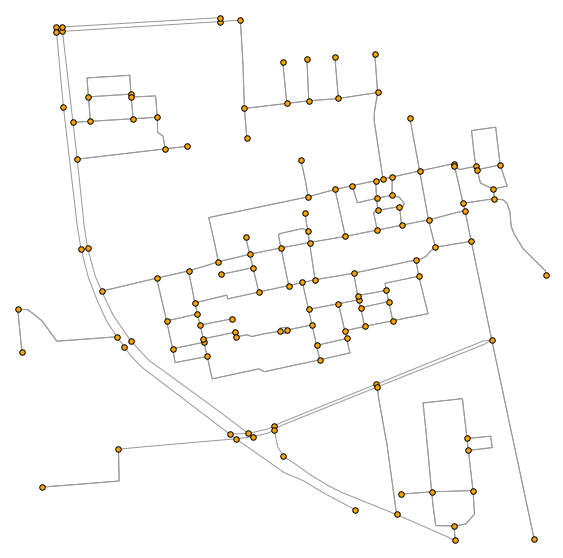

In [3]:
# get a street network and plot it with all edge intersections
address = '39.9499, 116.3361'
G = ox.graph_from_address(address, network_type='drive', distance=750)
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj, fig_height=10, node_color='orange', node_size=30, 
                        node_zorder=2, node_edgecolor='k')

## 清理交叉口

我们将指定该网络中彼此相距15米的任何节点都属于同一交叉点。根据您要检查的社区中的街道设计标准来调整此公差，并使用投影图以有意义的单位（例如仪表）工作。我们还将指定我们不希望死机-
在我们清除后的交叉点列表中返回的终点。然后，我们提取它们的xy坐标并将其绘制出来，以显示下面的净交点与上面的拓扑边交点的比较。

In [4]:
# clean up the intersections and extract their xy coords   # 清理交叉口并延展其范围
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

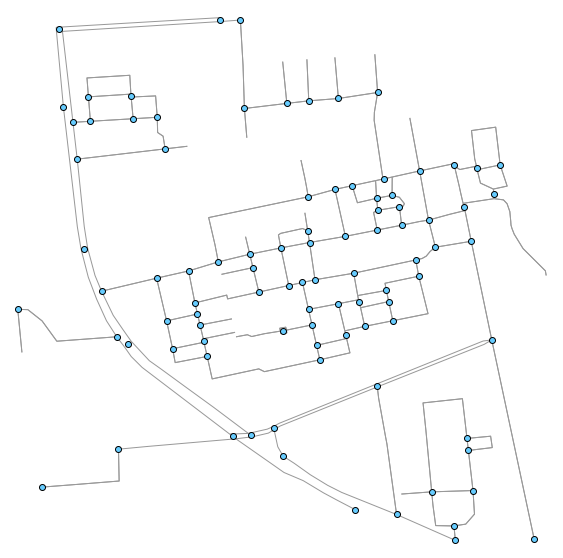

In [5]:
# plot the cleaned-up intersections  # 绘制出清理后的结果
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

请注意，这些清理后的交叉路口为我们提供了更准确的交叉路口数和密度，但不会更改或与网络拓扑集成。